In [2]:
!pip install pandas

In [3]:
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns. set (color_codes=True)

# **Loading the dataset**
Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the
value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data
frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the
notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to
select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive
or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that
uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [7]:
df=pd.read_csv("cars.csv")
#To display the top 5 rows
df.head(5)
df.tail(5)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


# **Checking the types of data**
Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that
case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the
data is already in integer format so nothing te worry.

In [8]:
df.dtypes

,0
name,object
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,int64


# **Dropping irrelevant columns**
This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such
cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style,
Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [9]:
df = df.drop([ 'qsec'], axis=1)
df.head (5)

,name,mpg,cyl,disp,hp,drat,wt,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0,0,3,2


# **Renaming the columns**
In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a
good approach it improves the readability of the data set.


In [14]:
df = df. rename(columns={"cyl": "cylinders", "wt": "weight"})
df. head (5)

,name,mpg,cylinders,disp,hp,drat,weight,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0,0,3,2


**Dropping the duplicate rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some
duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set.

In [15]:
df.shape


(32, 11)

In [17]:
duplicate_rows_df = df[df. duplicated ( )]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


# **Counting the number of Rows**

In [18]:
df.count()

,0
name,32
mpg,32
cylinders,32
disp,32
hp,32
drat,32
weight,32
vs,32
am,32
gear,32


# **Dropping the Duplicate Values**


In [20]:
df = df. drop_duplicates ( )
df. head (5)


,name,mpg,cylinders,disp,hp,drat,weight,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0,0,3,2


In [21]:
df. count ( )

,0
name,32
mpg,32
cylinders,32
disp,32
hp,32
drat,32
weight,32
vs,32
am,32
gear,32


# **Dropping the missing or null values.**
This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is
not a good approach to do so, because many people just replace the missing values with the mean or the average of that
column, but in this case, I just dropped that missing values.

In [22]:
print(df.isnull().sum() )

name         0
mpg          0
cylinders    0
disp         0
hp           0
drat         0
weight       0
vs           0
am           0
gear         0
carb         0
dtype: int64


In [23]:
df = df. dropna ( ) # Dropping the missing values.
df. count ( )

,0
name,32
mpg,32
cylinders,32
disp,32
hp,32
drat,32
weight,32
vs,32
am,32
gear,32


Now we have removed all the rows which contain the Null or N/A values

In [24]:
print(df.isnull().sum()) # After dropping the values

name         0
mpg          0
cylinders    0
disp         0
hp           0
drat         0
weight       0
vs           0
am           0
gear         0
carb         0
dtype: int64


**Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's
often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less
accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is
called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of
MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are
none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken
help of a tutorial from towards data science.

<Axes: xlabel='weight'>

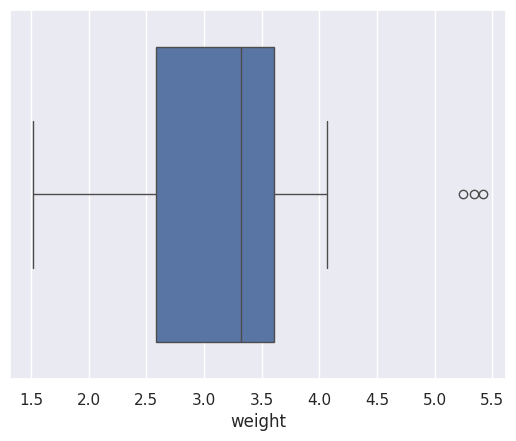

In [25]:
sns. boxplot (x=df[ 'weight' ])


<Axes: xlabel='hp'>

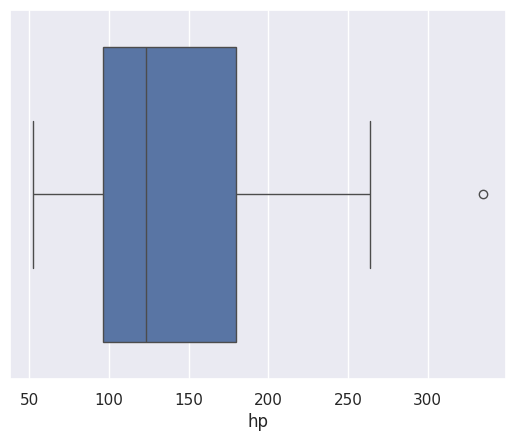

In [26]:
sns. boxplot (x=df [ 'hp' ] )

<Axes: xlabel='disp'>

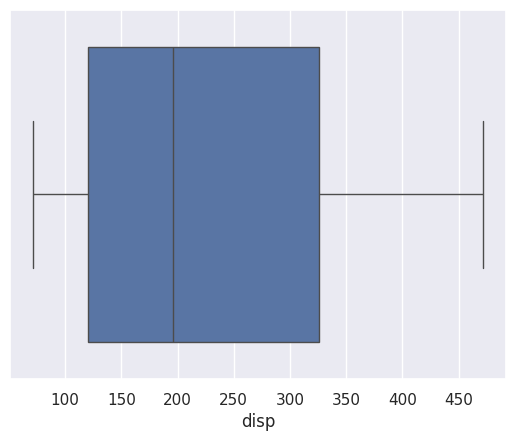

In [28]:

sns. boxplot (x=df [ 'disp'])

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the 1st and 3rd quartiles
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1
print(IQR)

mpg            7.37500
cylinders      4.00000
disp         205.17500
hp            83.50000
drat           0.84000
weight         1.02875
vs             1.00000
am             1.00000
gear           1.00000
carb           2.00000
dtype: float64


# **Correlation of different features**

In [34]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                mpg  cylinders      disp        hp      drat    weight  \
mpg        1.000000  -0.852162 -0.847551 -0.776168  0.681172 -0.867659   
cylinders -0.852162   1.000000  0.902033  0.832447 -0.699938  0.782496   
disp      -0.847551   0.902033  1.000000  0.790949 -0.710214  0.887980   
hp        -0.776168   0.832447  0.790949  1.000000 -0.448759  0.658748   
drat       0.681172  -0.699938 -0.710214 -0.448759  1.000000 -0.712441   
weight    -0.867659   0.782496  0.887980  0.658748 -0.712441  1.000000   
vs         0.664039  -0.810812 -0.710416 -0.723097  0.440278 -0.554916   
am         0.599832  -0.522607 -0.591227 -0.243204  0.712711 -0.692495   
gear       0.480285  -0.492687 -0.555569 -0.125704  0.699610 -0.583287   
carb      -0.550925   0.526988  0.394977  0.749812 -0.090790  0.427606   

                 vs        am      gear      carb  
mpg        0.664039  0.599832  0.480285 -0.550925  
cylinders -0.810812 -0.522607 -0.492687  0.526988  
disp      -0.710416 -0.591227

# **Heat Maps**


<Axes: >

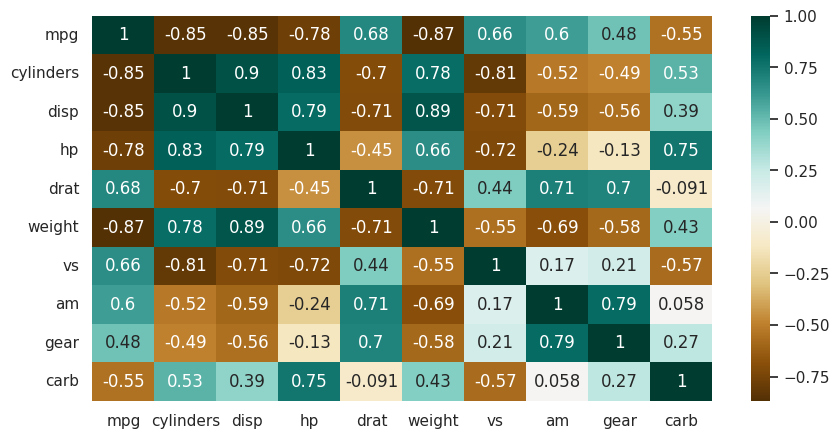

In [36]:
 # Adjusting the Size of Figure
plt. figure(figsize=(10,5))
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Displaying the correlation using the Heap Map
sns. heatmap(correlation_matrix, cmap="BrBG", annot=True) # Br: Brown. B: Blue, G: Green
#correlation